In [10]:
from pathlib import Path
from pandas.plotting import scatter_matrix

%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 100)

In [11]:
"""
Python for Finance: Mastering data driven finance.
Chapter 12 - Stochastics

This chapter introduces 

"Random Numbers"
Pseudo-random numbers build basis for all simulation efforts.

"Simulation"
In finance two simulation taks are of importance: simulation of random variables and stochastic prosesses.

"Valuation"
Two main disiplines when it comes to valuation are valuation with Euro exercise and US exercise
also Bermudan exercise(a finite set of spefific dates)

"Risk Measuers"
Simulation lends well to the calculation of risk like[value at risk, credit value-at-risk and credit valuation adjustments]
"""
cash_flow = pd.read_csv('us-cashflow-annual.csv',infer_datetime_format=True, parse_dates=True, delimiter=';')
cash_flow.rename(columns={'Report Date':'Date'}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'us-cashflow-annual.csv'

In [4]:
cash_flow.set_index(['Ticker','Date'], inplace=True)

cash_flow.shape

(19238, 26)

In [5]:
cash_flow = cash_flow.fillna(0)

In [6]:
import math 
import numpy as np 
import numpy.random as npr
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline


# Random Numbers 


npr.seed(100)
np.set_printoptions(precision=4)

In [7]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [8]:
npr.rand(10, 5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365],
       [0.8904, 0.9809, 0.0599, 0.8905, 0.5769],
       [0.7425, 0.6302, 0.5818, 0.0204, 0.21  ],
       [0.5447, 0.7691, 0.2507, 0.2859, 0.8524],
       [0.975 , 0.8849, 0.3595, 0.5989, 0.3548],
       [0.3402, 0.1781, 0.2377, 0.0449, 0.5054]])

In [9]:
a = 5
b = 10

npr.rand(10) * (b - a) + a

array([6.8813, 7.964 , 8.1497, 5.713 , 9.6692, 9.7319, 8.0115, 6.9388,
       6.8159, 6.0217])

In [10]:
npr.rand(4, 4) * (b - a) + a

array([[6.3838, 6.2327, 5.868 , 9.833 ],
       [9.7851, 7.9899, 8.6565, 6.7019],
       [5.4603, 7.3175, 7.5435, 5.4423],
       [7.6402, 9.9608, 6.9752, 6.678 ]])

Text(0.5, 1.0, 'Poisson')

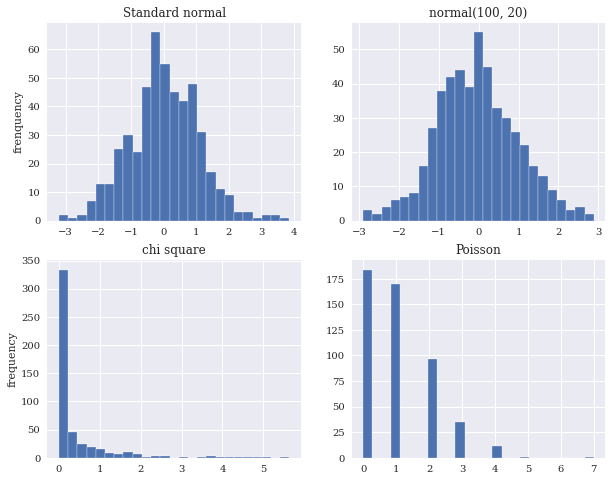

In [11]:
"""
Next plot visualizes random draws from the following distribution.

* Standard normal with mean of 0 and std of 1.
* Normal with mean of 100 and std of 20.
* Chi square with 0.5 degress of freedom.
* Poisson with lambda of 1.

The result is 3 continuos distributions and the discrete one (Poisson)
Poisson is used to simulate the arrival of (rare) extrenal events.
Like a jump or drop of an instrument or exogenic shock
"""
sample_size = 500

rn1 = npr.standard_normal(sample_size) # Standard normally distributed random numbers
rn2 = npr.standard_normal(sample_size) # Nprmally distributed random numbers
rn3 = npr.chisquare(df=0.5, size=sample_size) # Chi-square distributed random numbers
rn4 = npr.poisson(lam=1.0, size=sample_size) # Poisson distributed numbers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                              figsize=(10,8))

ax1.hist(rn1, bins=25)
ax1.set_title('Standard normal')
ax1.set_ylabel('frenquency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')




In [12]:
"""
#Simulation

Monte Carlo simulation (MCS) is one of the most important numerical techniques in fianace.
It is flaexible numerical method when it comes to the evalutaion of math expressions.
The valuation of financial derivatives. 
Hundreds of thousands even millions of computaions have to be carried out to come up with a single value estimate.
"""

'\n#Simulation\n\nMonte Carlo simulation (MCS) is one of the most important numerical techniques in fianace.\nIt is flaexible numerical method when it comes to the evalutaion of math expressions.\nThe valuation of financial derivatives. \nHundreds of thousands even millions of computaions have to be carried out to come up with a single value estimate.\n'

In [13]:
"""
# Random Variables 
The Black-Scholes-Merton setup for option pricing.

The variables and parameters have the following meaning:

ST = Index leel at date T
r = Constant riskless short rate
o = Constant volatility(= std of returns) of S
z = Standard normally distributed variable
"""

S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000 
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
                 sigma * math.sqrt(T) * npr.standard_normal(I))
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * math.sqrt(T), size=I)

Text(0, 0.5, 'frequency')

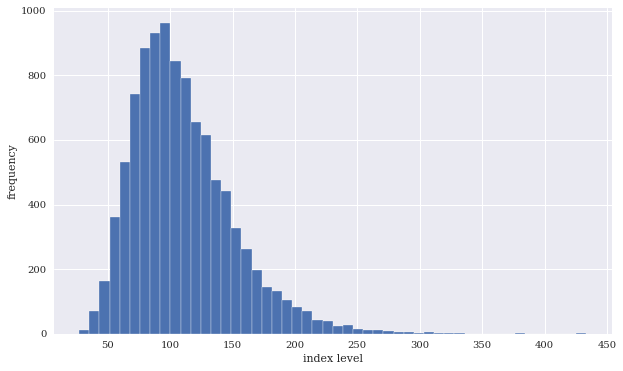

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [15]:
"""
A statistical mements of the sulting distributions.
The scipy.stats subpackage and helper function prove useful
"""
import scipy.stats as scs

def print_stats(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
    ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))


    
    
    
print_stats(ST1,ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.035         30.474
           max        433.432        368.028
          mean        110.425        110.958
           std         40.553         41.069
          skew          1.132          1.185
      kurtosis          2.287          2.359


Text(0, 0.5, 'frequency')

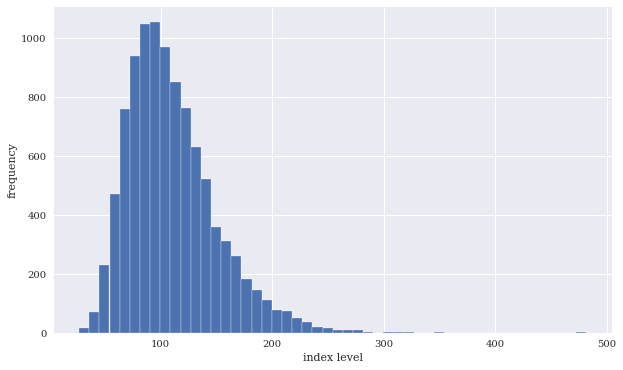

In [16]:
"""
# Stochastic Prosesses 
A stochastic process is a sequence of random variables. in that sense,
one should expect something similar to a sequence of repeated simulations of a random variable when simulating the process.
Draws are typically not independent but rather depend on the results of previos draws.

Stochastic process used in fiance exhibit the Markov property which maily says
(tomorrow's value of the process only depends on todays state of the process not any more.
The process then is also called memoryless

Geometric Brownian motion

The values for the index level are log-normally distributed.
"""
I = 10000 # The number of path to be simulated 
M = 50 # The number of time intervals for the discretizatiom 
dt = T / M # The length of time interval in year fractions
S = np.zeros((M + 1, I)) # The two-simansional adarray object for the index levels
S[0] = S0 # The intial values for the initial point in time t= 0 
for t in range (1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                            sigma * math.sqrt(dt) * npr.standard_normal(I)) # The simulation via semivectorized expression
    # The loop is over the point in the staring at t=1 and ending at t = T

    
    
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [17]:
print_stats(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.049         30.474
           max        481.442        368.028
          mean        110.481        110.958
           std         40.283         41.069
          skew          1.216          1.185
      kurtosis          3.327          2.359


'\nUsing the dynamic simulatied approach not only allows us to visualize paths as displayed in plot.\nAlos to value options with USA/Nermudad exercise or options whore payoff is path-dependent.\n\n\n\n'

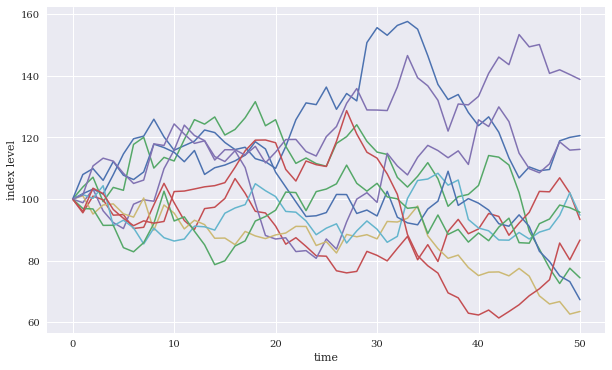

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

"""
Using the dynamic simulatied approach not only allows us to visualize paths as displayed in plot.
Alos to value options with USA/Nermudad exercise or options whore payoff is path-dependent.



"""

In [19]:
"""
Square-root-diffusion 
'Mean-Reverting-Processes' are used to model short rates or volatility processes.

The square-root disffusion has the convenient and realistic characteristic that the values of Xt remain strictly +.
Whe discretzing it by an Euler scheme, negative values cannot be excluded.
The reason why one works with + version of original simulated process. 
In the simulation code, one therefore needs two ndarray objects instead of only one.
"""

x0 = 0.05 # The initial value 
kappa = 3.0  # The mean reversion factor 
theta = 0.02 # The long-term mean value
sigma = 0.1 # The volatility factor
I = 10000 # 
M = 50 
dt = T / M 

def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1,M +1):
        xh[t] = (xh[t - 1] +
                kappa + (theta - np.maximum(xh[t - 1], 0)) * dt +\
                 sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * math.sqrt(dt)\
                 * npr.standard_normal(I)) # The simulation based on an Euler scheme
    x = np.maximum(xh, 0 )
    return x 
x1 = srd_euler()
        

Text(0, 0.5, 'frequency')

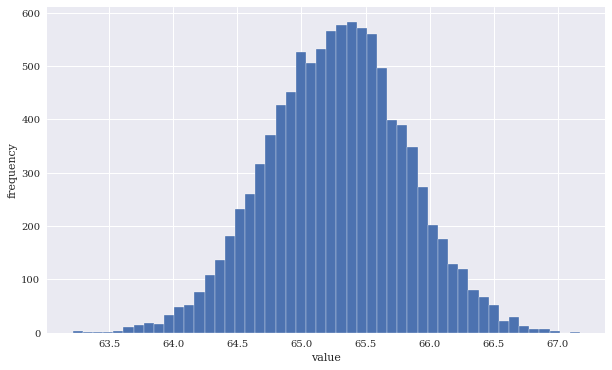

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

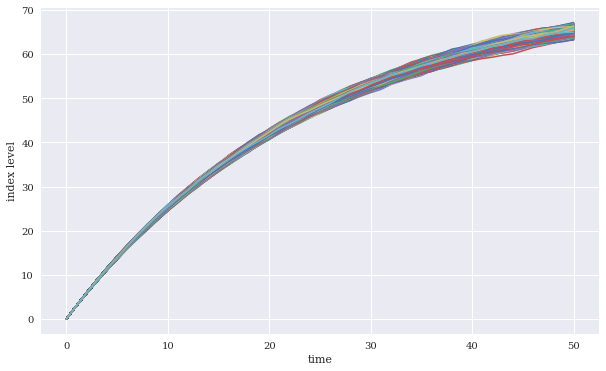

In [21]:

# This plot show the first 10 simulated paths

plt.figure(figsize=(10,6))
plt.plot(x1[:, :-10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [22]:
"""
Stochastic Volatility and the leverage effect are stylized facts (empirical) founds in a number of markets.
Another important stylized fact is the existence of jumps in asset prices and volatility.

Given the discretization scheme, consider the numerical parameterization:
"""

S0 = 100
r = 0.05
sigma = 0.2
lamb = 0.75 # The jump intensity
mu = -0.6 # The mean jump size
delta = 0.25 # The jump valatility
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1) # The drift correction

In [23]:
T = 1.0
m = 50
I = 10000
dt = T / M

Text(0, 0.5, 'frequency')

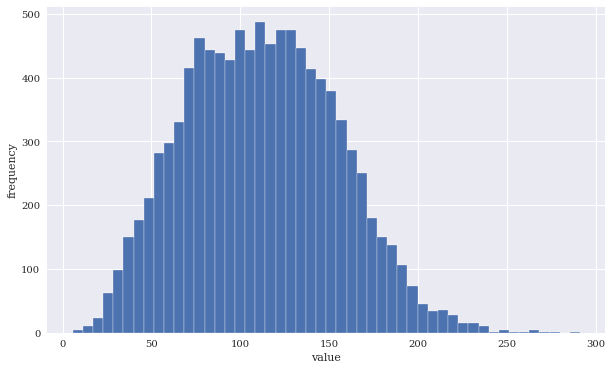

In [24]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I)) # Standarard normally distributed random numbers
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I)) # Poisson distributed random numbers
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn1[t] + (np.exp(mu + delta * sn2[t]) - 1) * poi[t]))
    # ^ Simulation based on the exact Eular scheme.                   
    S[t] = np.maximum(S[t], 0)
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

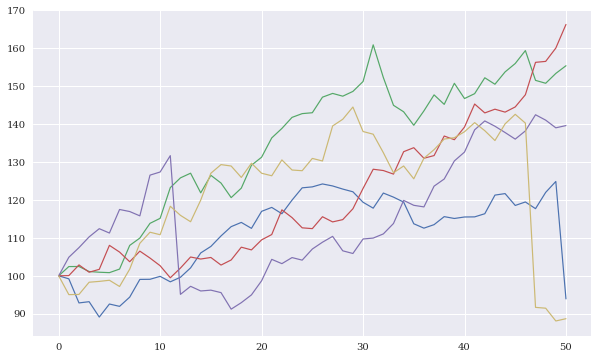

In [25]:
"""
Negative jumps can also be spotted in the first 10 simulated index level paths
"""

plt.figure(figsize=(10, 6))
plt.plot(S[:, :5], lw=1.2)

In [26]:
def gen_sn(M, I, anti_paths=True, no_match=True):
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if no_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [27]:

def gbm_mcs_amer(K, option='call'):
    ''' Valutaion of USA option in Black - Scholes - Merton
    by Monte Carlo simulation by LSM algo
    
    Parameters
    ========
    K: float 
        (positive) strike of the option
    option: string
        type of the option to be valued ('call', 'put')
        
    Returns
    ========
    C0 = float
        estimated present value of American call option'''
    
    dt = T / M 
    df = math.exp(-r*dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t  in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])
        # case based calculation of payoff
        if option == 'call':
            h = np.maximum(S - K, 0)
        else:
            h = np.maximum(K - S, 0)
        # LSM algo
        V = np.copy(h)
        for t in range(M - 1, 0, -1):
            reg = np.polyfit(S[t], V[t + 1] * df, 7)
            C  = np.polyval(reg, S[t])
            V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
        # MCS estimator
        C0 = df * np.mean(V[1])
        return C0

In [28]:
gbm_mcs_amer(110, option='call')

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\numpy\lib\polynomial.py:628: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
gbm_mcs_amer(110, option='put')

In [32]:
# Risk Measure
"""
Risk management is another important application of stochastic methods and simulation.

# Values-at-Risk 
One of the most widely ussed risk measure, and much debated one.
Criticized with regards to its limited ability to captpute what is called 'tail risk'.

VaR is a number denoted in currency units indicating a loss that is not exceeded with some confidence level
(probability) over a period of time.

Assume the Black-Scholes-Merton setup and consider the following parameterization and simulation
of index levels at a future date T = 30/365 A perdiod of 30 days.
The estimation of VaR figures requires the simulated absolute porfits and losses
relative to the value of the postion today in a sorted matter frpm the severest loss to the largest profit
"""
S0 = 100
r = 0.05
sigma = 0.25
T = 30/365
I = 10000

ST = S0 * np.exp((r - 0.5 * sigma ** 2 ) * T + sigma * np.sqrt(T) * npr.standard_normal(I))
# Simulates end of project values for the geometric Brownian motion.

Text(0, 0.5, 'frequency')

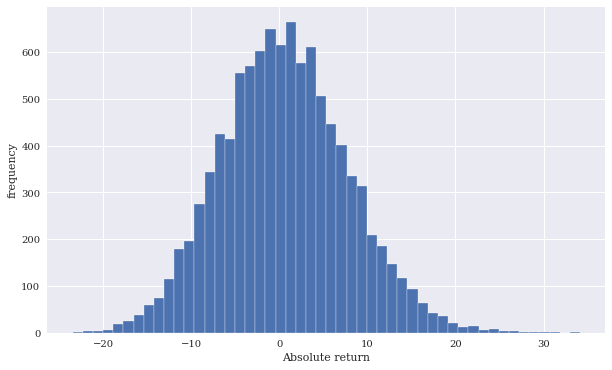

In [33]:
R_gbm = np.sort(ST - S0) # Calculates the absolute profits and losses per simulation run and sorts the values.

plt.figure(figsize=(10,6))
plt.hist(R_gbm, bins=50)
plt.xlabel('Absolute return')
plt.ylabel('frequency')

In [34]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('16%s %16s' % ('Cofident Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs,var):
    print("%16.2f %16.3f" % (100 - pair[0], - pair[1]))

16Cofident Level    Value-at-Risk
---------------------------------
           99.99           21.602
           99.90           19.536
           99.00           15.270
           97.50           12.833
           95.00           10.911
           90.00            8.480


In [35]:
"""
# Credit Valuation Adjustments 

Risk measures are the credit value-at-risk (CVaR) and the credit valutaion adjustment 
Roughly speaking CVaR is a measure for the risk resulting from the possibility that
a counterparty might not be able to honor it
These are two main assumptions to be made: 
the probability of default and the (average) loss level.

Again the benchmatk setup of the Black-Scholes-Merton with the parameterization in the following code.

"""
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))
L = 0.5 # Defines the loss level

p = 0.01 # Defines the probability of dafault

D = npr.poisson(p * T, I) # Simulates default events
D = np.where(D > 1, 1, D) # Limits defaults to one such event


In [36]:
math.exp(-r * T) * np.mean(ST) # The discounted average simulated value of the asset at T.


100.01606093348852

In [37]:
CVaR = math.exp(-r * T) * np.mean(L * D * ST) # CVaR as the discounted average of the future losses im the case of a default.
CVaR

0.5038114181747825

In [38]:
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)
# Discounted average simulated value of the asset at T, adjusted for the simulated losses from default
S0_CVA

99.51224951531371

In [39]:
S0_adj = S0 - CVaR # Curent price of the asset adjusted by the simulated CVaR
S0_adj

99.49618858182522

In [40]:
"""
# Chapter 13:

Statistics is a vast field, but the tools and results and it provides have become indispensable for fianace. 
The more elaborate and complex statistical models, the more important it is to have high performing computational solutions.

This chapter has four focal points.

'Normality Tests'
A large nurmber of fianncial models, rest on the assumption that returns of securities are normally distibuted.
Therefore, this chapter represents approaches to test a given time series for normality of returns.

'Portfolio Optimization'
MPT can be considered a big successes of statistics in fiannce. 
Starting in the early 1950s could be the first real quantitative model and approach in finance.

'Bayesian Statistics'
On a conceptual level:
Bayesian statistics introduces the notion of beliefs of agents and the updating of beliefs to statistics. 
When it come linear regression, might take the form of having a statistical distribution for regression paremeters 
instead of single point estimates (for the intercept and slope of the regression).
Nowadays, Bayesian methods are widely used in finance, which is why this section illustrates Bayesian methods based on examples.

'Machine Learning'
Machine Learning (Statistical Learning) is based on advanced statistical methods and is considered a subdiscipline of AI

Like statistics itself, machine learning offers a rich set of approaches and models to learn form data sets
and create predictions based on what is learned. Different algo of learning are distinguished,
such as those for supervised learning or unsupervised learning.
The types of problems solved by the algo differ as well, such as estimation or classifiacation.
Examples in this chapter can fall into the supervised learning classification.


# Normality Tests 

The 'normal distribution' can be considered the most important distribution in fianace
and one of the majpr statistical building blocks of financial theory. 
Following cornerstone of fianacial theory rest to a large extent on the assumption that retunrs are normally distributed.

Portfolio theory
When stock returns are normally distributed, optimal portfolio choice can be cast into a setting
where only the (expected) mean return and the variance of the returns (or the volatility) as well as
the covariances between diffrent stocks are relavent for an investment decision (Optimal Portfolio Composition)

Capital asset pricing model
When stock returns are normally distributed, prices of single stocks can be elegantly expressed in linear relationship
to a broad market index; the relationship is generally expressed by a measure of the co-movement of a single stock 
with the markert index called beta or B

Efficient markerts hypothesis
An efficient market is a market where prices reflect all available information,
where all can be defined more narrowly or widely
(as in 'all pubblicly available' information vs. includuing also 'only privately available information')
If this thesis holds true, then stock prices fluctuate randomly and returns are normally distributed.

Option pricing theory 
Brownian motion, is the benchmark model for the modeling of random price movements of financial intruments.
Black-Scholes-Merton option pricing formula uses a geometric Brownian motion
as the model for a stocks random price fluctuations over time, leading to log-normally distributed prices and
normally distributed returns.
"""

"\n# Chapter 13:\n\nStatistics is a vast field, but the tools and results and it provides have become indispensable for fianace. \nThe more elaborate and complex statistical models, the more important it is to have high performing computational solutions.\n\nThis chapter has four focal points.\n\n'Normality Tests'\nA large nurmber of fianncial models, rest on the assumption that returns of securities are normally distibuted.\nTherefore, this chapter represents approaches to test a given time series for normality of returns.\n\n'Portfolio Optimization'\nMPT can be considered a big successes of statistics in fiannce. \nStarting in the early 1950s could be the first real quantitative model and approach in finance.\n\n'Bayesian Statistics'\nOn a conceptual level:\nBayesian statistics introduces the notion of beliefs of agents and the updating of beliefs to statistics. \nWhen it come linear regression, might take the form of having a statistical distribution for regression paremeters \ninst

In [41]:
"""
The following uses the function gen_paths() to generate sample Monte Carlo paths 
for the geometric Brownian motion
"""
def gen_paths(S0, r, sigma, T, M , I):
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std() # Matching first and second moment
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand)
        # Vectorized Euler discretization of geometric Brownian motion
    return paths

In [42]:
"""
The simulation as shown here, generating, in combination with the fuction gen_paths()
250,000 paths with 50 time steps each.
Next plot show the first 10 simulated paths:
"""

S0 = 100 # Inilital value for simulated processes
r = 0.05 # Constant short rate
sigma = 0.2 # Constant volatility factor
T = 1.0 # Time horizon in year fractions
I = 250000 # Number of suimulated processes
np.random.seed(1000) # Expected value and average simulated value

In [43]:
paths = gen_paths(S0, r, sigma, T, M, I )

In [44]:
S0 * math.exp(r * T)

105.12710963760242

In [45]:
paths[-1].mean()

105.12645392478755

Text(0, 0.5, 'Index level')

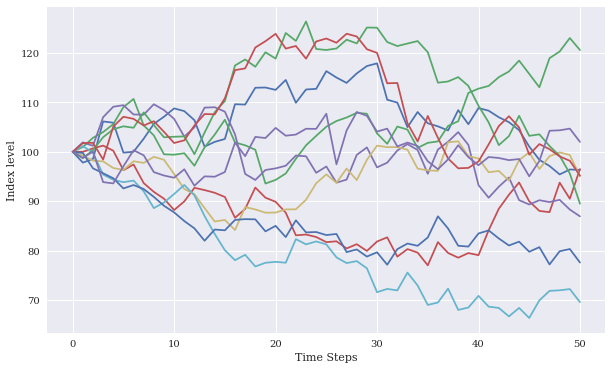

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('Time Steps')
plt.ylabel('Index level')

In [47]:
log_returns = np.log(paths[1:] / paths[:-1])

log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [48]:
"""
A statistical mements of the sulting distributions.
The scipy.stats subpackage and helper function prove useful
"""
import scipy.stats as scs

def print_stats(array):
    sta = scs.describe(array)
    print('%14s %15s'  % ('statistics', 'value'))
    print(30 * "-")
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))


    
    
    
print_stats(log_returns.flatten())

    statistics           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


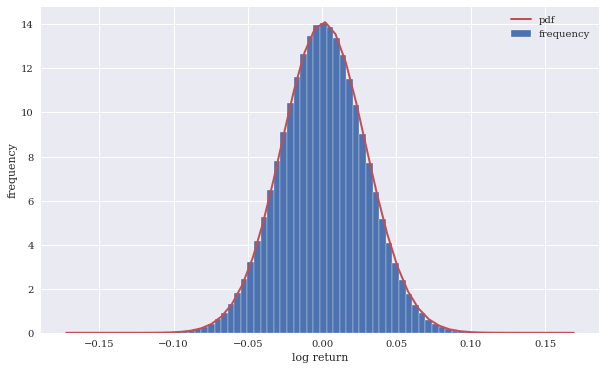

In [49]:
'''
This plot compares the frequency distribution of the simulated log returns with the probability density function (PDF)
of the normal distribution given the parameterizations for r and sigma.
The function used is norm.pdf() from the scipy.stats sub package
'''
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True,
         label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r',lw=2.0, label='pdf')
plt.legend()

In [50]:
"""
# Real World Data
This section analyzes four historical fianacial time series, two for technology stocks and to exchange traded funds (ETF):
"""
vix = pd.read_csv('VIX.csv',infer_datetime_format=True, parse_dates=True, index_col=['Date'])
#income.rename(columns={'Report Date':'Date'}, inplace=True)

vix_close = vix[['Close']].round(3)
vix_close.rename(columns={'Close':'vix_close'}, inplace=True)
vix_close.reset_index(inplace=True)
vix_close

Date  vix_close
0    2010-01-04      20.04
1    2010-01-05      19.35
2    2010-01-06      19.16
3    2010-01-07      19.06
4    2010-01-08      18.13
...         ...        ...
2248 2018-12-07      23.23
2249 2018-12-10      22.64
2250 2018-12-11      21.76
2251 2018-12-12      21.46
2252 2018-12-13      20.65

[2253 rows x 2 columns]

In [51]:
spy = pd.read_csv('SPY.csv',infer_datetime_format=True, parse_dates=True, delimiter=',')
spy_close = spy[['Close']][:2253].round(2)
spy_close.rename(columns={'Close':'spy_close'},inplace=True)
spy_close.reset_index(inplace=True)

In [52]:
dow = pd.read_csv('djia_.csv',infer_datetime_format=True, parse_dates=True, index_col='Date')
dow_closedow_close = dow[['Close']][:2253].round(2)
dow_closedow_close.rename(columns={'Close':'dow_close'},inplace=True)
dow_closedow_close.reset_index(inplace=True)
dow_closedow_close

Date  dow_close
0    2010-01-04   10583.96
1    2010-01-05   10572.02
2    2010-01-06   10573.68
3    2010-01-07   10606.86
4    2010-01-08   10618.19
...         ...        ...
2248 2018-12-07   24388.95
2249 2018-12-10   24423.26
2250 2018-12-11   24370.24
2251 2018-12-12   24527.27
2252 2018-12-13   24597.38

[2253 rows x 2 columns]

In [53]:
spy = pd.read_csv('SPY.csv',infer_datetime_format=True, parse_dates=True, delimiter=',')

spy_close.rename(columns={'Close':'spy_close'},inplace=True)
spy_close.reset_index(inplace=True)

In [54]:
spfive_closefull = pd.read_csv('sp500_closefull.csv',
                               infer_datetime_format=True,
                               parse_dates=True,
                               index_col=['Date'])

fullsend = spfive_closefull[['AAPL','AME','AMT', 'AXP']]
symbols = ['AAPL','AME','AMT', 'AXP']
#AME = spfive_closefull[['AME']]
#amt = spfive_closefull[['AMT']]
#AXP = spfive_closefull[['AXP']]
noa = len(symbols)

In [55]:
#aapl_close = aapl[['AAPL']][:2253].round(2)
#AXP_close = AXP[['AXP']][:2253].round(2)

#AME_close = AME[['AME']][:2253].round(2)
#amt_close = amt[['AMT']][:2253].round(2)

#data = pd.concat([aapl_close, AXP_close], axis=1)
#data_foreal = pd.concat([amt_close, AME_close], axis=1)

#real_data  = pd.concat([data, data_foreal], axis=1)

<AxesSubplot:xlabel='Date'>

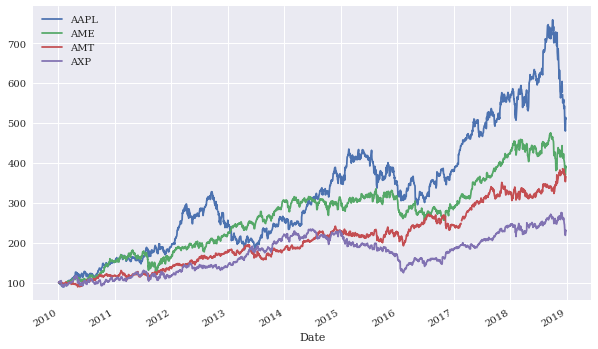

In [56]:
(fullsend / fullsend.iloc[0] * 100).plot(figsize=(10, 6))

AAPL       AME       AMT       AXP
Date                                              
2018-12-24 -0.026215 -0.028938 -0.028373 -0.020241
2018-12-26  0.068053  0.044761  0.025394  0.047353
2018-12-27 -0.006511  0.015873  0.006769  0.008912
2018-12-28  0.000512 -0.008654  0.001449 -0.002750
2018-12-31       NaN       NaN       NaN       NaN

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'AME'}>],
       [<AxesSubplot:title={'center':'AMT'}>,
        <AxesSubplot:title={'center':'AXP'}>]], dtype=object)

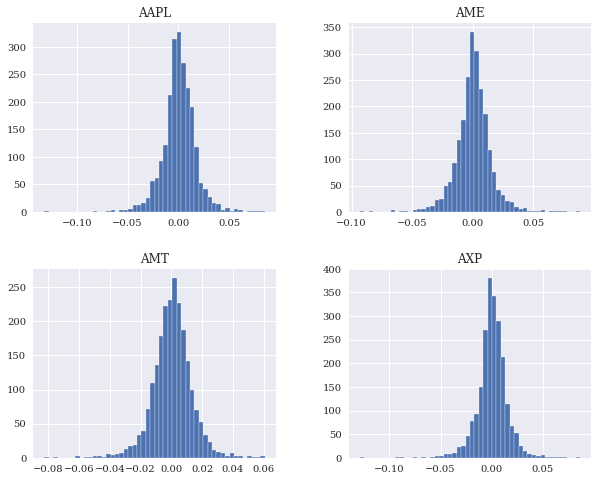

In [57]:
# Shows the log returns of financial instrument as histogram
fullsend = spfive_closefull[['AAPL','AME','AMT', 'AXP']]
symbols = ['AAPL','AME','AMT', 'AXP']
log_returns = np.log(fullsend / fullsend.shift(1))
display(log_returns.tail())
log_returns.hist(bins=50, figsize=(10, 8))

In [58]:
# The different statistics for the time series data.

for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_stats(log_data)


Results for symbol AAPL
------------------------------
    statistics           value
------------------------------
          size      2256.00000
           min        -0.13188
           max         0.08502
          mean         0.00072
           std         0.01622
          skew        -0.24650
      kurtosis         4.46875

Results for symbol AME
------------------------------
    statistics           value
------------------------------
          size      2256.00000
           min        -0.09331
           max         0.08899
          mean         0.00060
           std         0.01438
          skew        -0.04378
      kurtosis         4.46686

Results for symbol AMT
------------------------------
    statistics           value
------------------------------
          size      2256.00000
           min        -0.08253
           max         0.06088
          mean         0.00053
           std         0.01294
          skew        -0.30231
      kurtosis         3.381

AAPL       AME       AMT       AXP
Date                                              
2018-12-24 -0.026215 -0.028938 -0.028373 -0.020241
2018-12-26  0.068053  0.044761  0.025394  0.047353
2018-12-27 -0.006511  0.015873  0.006769  0.008912
2018-12-28  0.000512 -0.008654  0.001449 -0.002750
2018-12-31       NaN       NaN       NaN       NaN

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'AME'}>],
       [<AxesSubplot:title={'center':'AMT'}>,
        <AxesSubplot:title={'center':'AXP'}>]], dtype=object)

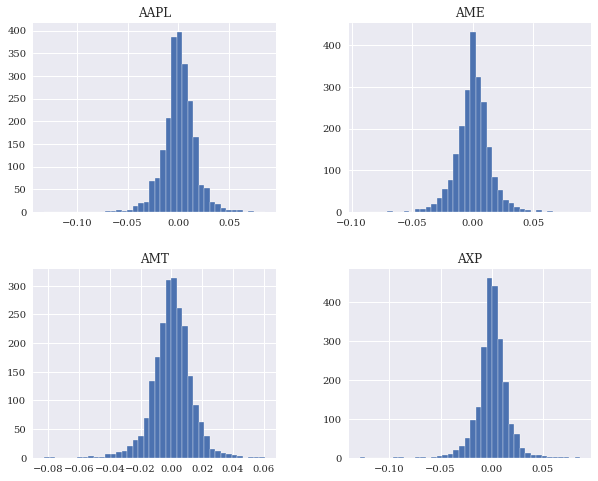

In [59]:
"""
# Portfolio Optimization 
Modern or mean-variance portfolio theory is a major cornerstone of financial theory.
This section illustrates the fundamental principles of the theory.

By looking only at mean and variance, we are necessarily assuming that no other statistics
are necessary to describe the distribution of end-of-period wealth.
Unless investors have a special utility function (quadratic utility function)
It is necessary to assume that returns have a normal distribution, which can be completly described by mean and variance.


The basic idea of MPT is make use of diversification to achive a certain level of risk.

"""
x# Shows the log returns of financial instrument as histogram
fullsend = spfive_closefull[['AAPL','AME','AMT', 'AXP']]
symbols = ['AAPL','AME','AMT', 'AXP']
nelk = np.log(fullsend / fullsend.shift(1))

display(log_returns.tail())
log_returns.hist(bins=40, figsize=(10, 8))

In [60]:
"""
The 'covariance matrix' for the financial instruments to be invested in is the central piece of the portfolio selection process.
Pandas has a built-in method to generate the 'covariance matrix' which is the same scaling factor applied:
"""



"\nThe 'covariance matrix' for the financial instruments to be invested in is the central piece of the portfolio selection process.\nPandas has a built-in method to generate the 'covariance matrix' which is the same scaling factor applied:\n"

In [61]:
nelk.mean() * 252 # Annualized mean returns

AAPL    0.182518
AME     0.151422
AMT     0.133528
AXP     0.090962
dtype: float64

In [62]:
nelk.cov() * 252 # Annualized covariance matrix

AAPL       AME       AMT       AXP
AAPL  0.066335  0.024117  0.015655  0.022250
AME   0.024117  0.052107  0.018710  0.030344
AMT   0.015655  0.018710  0.042193  0.017542
AXP   0.022250  0.030344  0.017542  0.054484

In [63]:
"""
# The Basic Theory 
In what follows no shorts are allowed, Only long. Impling that 100% of the investors wealth has to be divided in longs

The code generates four uniformly distributed random numbers between 0 and 1 and then
normalizes the values such that the sum of all values = 1:
"""

weights = np.random.random(noa) # Random portfolio weights

weights /= np.sum(weights) # Normalized to 1 or 100%

display(weights)

display(weights.sum())

array([0.0765, 0.0602, 0.6336, 0.2296])

1.0

In [64]:
np.sum(nelk.mean() * weights) * 252 # Annualized portfolio return given the porfolio weights

0.1285792359207679

In [65]:
np.dot(weights.T, np.dot(nelk.cov() * 252, weights)) # Annualized portfolio variance given the portfolio weights

0.03028461886775839

In [66]:
math.sqrt(np.dot(weights.T, np.dot(nelk.cov() * 252, weights))) # Annualized portfolio volatility givan the portfolio weights.

0.17402476509898926

In [67]:
"""
# Python and Vectorization
The MPT example shows how efficient it is with python to translate mathematical concepts,
like portfolio return or portfolio variance. in executable, vectorized code.

The following implements a Monte Carlo simulation to generate random portfolio weight vectors on a larger scale.
For every simulated allocation, the code records the resulting expected portfolio return and variance.
Two fucntions are created port_ret(), port_vol().
"""

def port_ret(weights):
    return np.sum(nelk.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(nelk.cov() * 252, weights)))


prets = []
pvols = []

for p in range(2500): # Monto Carlo simulation of poftfolio weights
    weights = np.random.random(noa) #  Monto Carlo simulation of poftfolio weights
    weights /= np.sum(weights) #  Monto Carlo simulation of poftfolio weights
    prets.append(port_ret(weights)) # Collects the resulting statistics in list objects 
    pvols.append(port_vol(weights))  # Collects the resulting statistics in list objects 
prets = np.array(prets)
pvols = np.array(pvols)


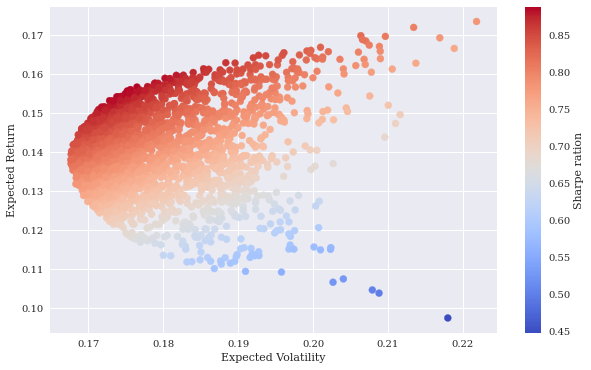

In [68]:
# The results of the Monte Carlo simulation

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c = prets /pvols,
           marker='o', cmap='coolwarm')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe ration')

In [69]:
"""
It is clear not all weight distributions perform well when measured in terms of mean and volatility. 

As an investor one is generally interested in the maximum return given
a fixed level of the minimum risk given a fixed return expectation.

This set of portfolios then makes up the so-called efficient frontier.

# Optimal Portfolios

This minimization function is quite general and allows for equality constraints, inequality constaints,
and numerical bounds for the parameters.

'The Maximization of the Sharpe ratio'. Formally, the negative value of the Sharpe ratio is minimized to derive at the 
maximum value and the optimal portfolio composition. The constraint is that all parameters (weights) add up to 1.
This can be formulated as follows using the conventions of the minimize() function.
The parameters values (weights) are also bound to be between 0 and 1.
These values are provided to the minimization fucntion as a tuple of tuples.

"""

"\nIt is clear not all weight distributions perform well when measured in terms of mean and volatility. \n\nAs an investor one is generally interested in the maximum return given\na fixed level of the minimum risk given a fixed return expectation.\n\nThis set of portfolios then makes up the so-called efficient frontier.\n\n# Optimal Portfolios\n\nThis minimization function is quite general and allows for equality constraints, inequality constaints,\nand numerical bounds for the parameters.\n\n'The Maximization of the Sharpe ratio'. Formally, the negative value of the Sharpe ratio is minimized to derive at the \nmaximum value and the optimal portfolio composition. The constraint is that all parameters (weights) add up to 1.\nThis can be formulated as follows using the conventions of the minimize() function.\nThe parameters values (weights) are also bound to be between 0 and 1.\nThese values are provided to the minimization fucntion as a tuple of tuples.\n\n"

In [70]:
"""
The only input that is missing for a call  of the optimazation funtion is a starting parameter list
(initial guess for the weights vector) An equal distribution of weights will do.
""" 
import scipy.optimize as  sco 

def min_func_sharpe(weights): # Function to be minimized 
    return -port_ret(weights) / port_vol(weights) # Function to be minimized 

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1}) # Equality constraint

bnds = tuple((0, 1) for x in range(noa)) # Bounds for the parameters

eweights = np.array(noa * [1. / noa,]) # Equal weights vector.

eweights

array([0.25, 0.25, 0.25, 0.25])

In [71]:
min_func_sharpe(eweights)

-0.8125205229490482

In [72]:
"""
This fucntion returns more than just the optimal parameter values. The results are stored in an object called opts.
The main interest lies in getting the optimal portfolio composition. One can access the results object with the key of intrest x.
"""
%time 
opts = sco.minimize(min_func_sharpe, eweights,
                   method='SLSQP', bounds=bnds,
                   constraints=cons) # The optimization (minimization of function min_func_sharpe)

Wall time: 0 ns


In [73]:
opts # The results from the optimization

     fun: -0.8893467328619177
     jac: array([-0.0003, -0.0007,  0.0009,  0.1394])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.3546, 0.2756, 0.3698, 0.    ])

In [74]:
opts['x'].round(3) # The optimal portfolio weights

array([0.355, 0.276, 0.37 , 0.   ])

In [75]:
port_ret(opts['x']).round(3) # The resulting portfolio return 

0.156

In [76]:
port_vol(opts['x']).round(3) # The resulting portfolio volatility

0.175

In [77]:
port_ret(opts['x']) / port_vol(opts['x']) # The maximum Sharpe ration

0.8893467328619177

In [78]:

# The minimization of the variance of the portfolio. This is the same as minimizing the volatility:
optv = sco.minimize(port_vol, eweights,
                   method='SLSQP', bounds=bnds,
                   constraints=cons) # The minimization of the portfolio valatility.

optv

     fun: 0.1675130310863934
     jac: array([0.1671, 0.1678, 0.1678, 0.1671])
 message: 'Optimization terminated successfully'
    nfev: 26
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.189 , 0.1823, 0.433 , 0.1957])

In [79]:
optv['x'].round(3)

array([0.189, 0.182, 0.433, 0.196])

In [80]:
port_vol(optv['x']).round(3)

0.168

In [81]:
port_ret(optv['x']).round(3)

"""
This time, the portfolio is made up of only there financial instruments. This portfolio mix leads
to the so-called minimum volatility or minimum variance poftfolio.

"""

'\nThis time, the portfolio is made up of only there financial instruments. This portfolio mix leads\nto the so-called minimum volatility or minimum variance poftfolio.\n\n'

In [82]:
"""
# Bayesian Statstics 

The most common interpretation of Bayes's formula in finance is the diachronic interpretation.
This mainly states that over time one learns new infotmation about certain variables or parameters of interest,
like the mean return of a time series

Bayesian Regression

With PyMC3 the Py ecosystem provides a  package to technically implement Bayesian statistics and probabilistic programming.
The follwing example based on noisy data around a straight line.
First a linear ordinary least-squares regression is implemented on the dataset.

"""

"\n# Bayesian Statstics \n\nThe most common interpretation of Bayes's formula in finance is the diachronic interpretation.\nThis mainly states that over time one learns new infotmation about certain variables or parameters of interest,\nlike the mean return of a time series\n\nBayesian Regression\n\nWith PyMC3 the Py ecosystem provides a  package to technically implement Bayesian statistics and probabilistic programming.\nThe follwing example based on noisy data around a straight line.\nFirst a linear ordinary least-squares regression is implemented on the dataset.\n\n"

In [83]:
import math 
import numpy as np 
import numpy.random as npr
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%matplotlib inline

In [84]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) + 2

reg_mon = np.polyfit(x, y, 1)

reg_mon

array([2.0169, 5.8882])

'\nThe resluts of the OLS regression approach are fixed values for the two parameters of the regression line (interceot and slope)\nNote that the highest-order monomial factor (in this case, the slope of the regression line) is at index level 0\nand that the intercept is at index level 1. The original parameters 2 & 4 are not perfectly recovered, due to noise in data.\n\n\n'

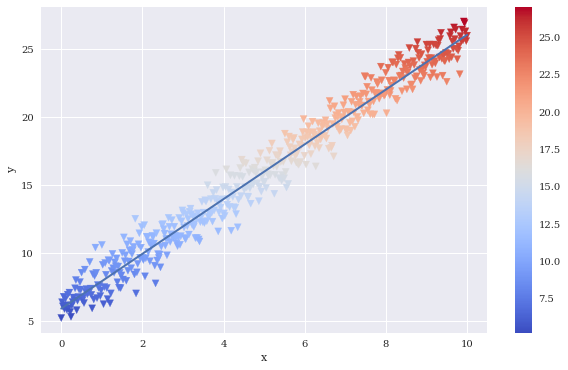

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, marker='v', cmap='coolwarm')
plt.plot(x, reg_mon[1] + reg_mon[0] * x, lw=2.0)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

"""
The resluts of the OLS regression approach are fixed values for the two parameters of the regression line (interceot and slope)
Note that the highest-order monomial factor (in this case, the slope of the regression line) is at index level 0
and that the intercept is at index level 1. The original parameters 2 & 4 are not perfectly recovered, due to noise in data.


"""

"""
A major element of Bayesian regression is Markov chain Monte Carlo (MCMC) sampling.
In principal, this is the same as drawing balls multiple times from boxes.

For the technical sampling, there are threee different fucntions to call:

find_MAP() finds the starting point for the sampling algo. By deriving the local maximum a posteriori point.

NUTS() implements the so-called 'efficient No-U-Turn Sampler with dual averaging' 
(NUTS) algo for MCMC sampling given the assumed priors.

sample() draws a number of samples given the starting value from find_MAP() and the optimal step size from the NUTS algo.
"""

import pymc3 as pm

%time
with pm.Model() as model:
    # model
    alpha = pm.Normal('alpha', mu=0, sd=20) # Defines the priors
    beta = pm.Normal('beta', sd=10) # Defines the priors
    sigma = pm.Uniform('sigma', lower=0,upper=10) # Defines the priors
    y_est = alpha + beta * x # Defines the linear regression
    likelihood = pm.Normal('y', mu=y_est, sd=sigma,
                           observed=y) # Defines the likelihood
    
    # inference 
    start = pm.find_MAP() # Finds the starting value by optimization
    step = pm.NUTS() # Instantiates the MCMC algo
    trace = pm.sample(100, tune=1000, start = start,
                      progressbar = True)  # Draws posterior samples using NUTS.
    
    
logp = -1,067.8
pm.summary(trace) # Shows summary statistics of samplings

In [ ]:
pm.summary(trace) # Shows summary statistics of samplings

In [ ]:
trace[0] # Estimates from the first example

In [ ]:
"""
Estimates are best illustrated with the help of a trace plot,
showing the resulting postterior distribution for the diffrent parameters as well as all single estimates per sample.
The posterios distribution gives an intuitive sence about the incertainty in the estimates:
"""
pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})


In [ ]:

# Taking onlt the alpha and beta values form the regression, one can draw all resulting regression lines as in plot

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, marker='v', cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x) # plots single regession line  
    

In [ ]:
"""
Two Financial Instruments 

Having introduced Bayesian regression with PyMC3 with real data.


"""



In [114]:
two_fin_inst = spfive_closefull[['XEC','BLL']]


In [115]:
data_fin = two_fin_inst / two_fin_inst.iloc[0]

In [116]:
two_fin_inst.iloc[-2] / two_fin_inst.iloc[0] - 1

XEC    0.110205
BLL    2.413983
dtype: float64

In [111]:
two_fin_inst.corr()

XEC       BLL
XEC  1.000000  0.635638
BLL  0.635638  1.000000

<AxesSubplot:xlabel='Date'>

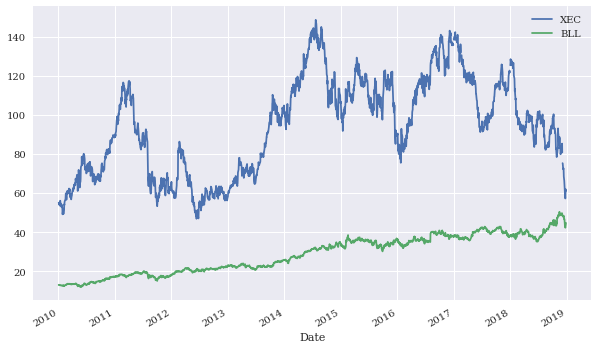

In [112]:
two_fin_inst.plot(figsize=(10,6))

In [125]:
"""
In what follows, the dates of the single data points are visualized in scatter plots. To this end, the datetimeIndex object of the dataframe is transformed to matplotlib dates. 
This plot shows a scatter plot of the time series data, plotting the values of one data point against another and illustrating the dates of each data pair by diffrent colorings
"""
display(two_fin_inst.index[:3])

mlp_dates = mpl.dates.date2num(two_fin_inst.index.to_pydatetime())

display(mlp_dates[:3])


DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06'], dtype='datetime64[ns]', name='Date', freq=None)

array([14613., 14614., 14615.])

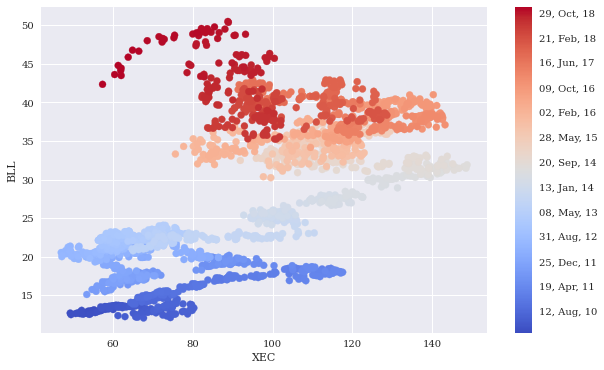

In [128]:
plt.figure(figsize=(10,6))
plt.scatter(two_fin_inst['XEC'], two_fin_inst['BLL'], c=mlp_dates, 
           marker='o', cmap='coolwarm')
plt.xlabel('XEC')
plt.ylabel('BLL')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
            format=mpl.dates.DateFormatter('%d, %b, %y'))


SyntaxError: invalid syntax (<ipython-input-153-4b37ef281455>, line 1)

In [145]:
"""
The following code implements a Bayesian regression on the bacis of these two time series.
The parameterization are essentially the same as in the previous example with dummy data.
The plot shows the results from the MCMC sampling procedure given the assumptions about the prior probability distribution for the tree parameters:
"""


"""
A major element of Bayesian regression is Markov chain Monte Carlo (MCMC) sampling.
In principal, this is the same as drawing balls multiple times from boxes.

For the technical sampling, there are threee different fucntions to call:

find_MAP() finds the starting point for the sampling algo. By deriving the local maximum a posteriori point.

NUTS() implements the so-called 'efficient No-U-Turn Sampler with dual averaging' 
(NUTS) algo for MCMC sampling given the assumed priors.

sample() draws a number of samples given the starting value from find_MAP() and the optimal step size from the NUTS algo.
"""

import pymc3 as pm

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=50)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    y_est = alpha + beta + two_fin_inst['XEC']
    
    likelihood = pm.Normal('BLL', mu=y_est, sd = sigma,
                           observed=two_fin_inst['XEC'][:2270])
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(250, tune=2000, start=start,
                     progressbar = True)

AttributeError: [unnamed] ~ Normal has no finite default value to use, checked: ('median', 'mean', 'mode'). Pass testval argument or adjust so value is finite.

KeyError: 'alpha'

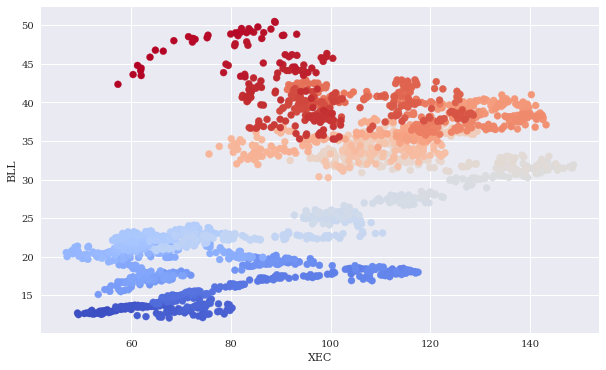

In [150]:
"""
Adds all the resulting regression lines to the scatter plot from before.
However, all the regression lines are pretty close to each other.

One of the major drawbacks of the regression approach used: the approach does take into account evolutions over time. 
That is, the most recent data is treated the same way as the olderst.
"""

plt.figure(figsize=(10, 6))
plt.scatter(two_fin_inst['XEC'], two_fin_inst['BLL'], c=mlp_dates,
           marker='o', cmap='coolwarm')
plt.xlabel('XEC')
plt.ylabel('BLL')
for i in range(len(two_fin_inst)):
    plt.plot(two_fin_inst['XEC'],
            two_fin_inst['alpha']['i'] + two_fin_inst['beta'][i] * two_fin_inst['XEC'])
    plt.colorbar(ticks=mlp.dates.DateFormatter('%d %b %y'))

In [ ]:
"""
Updating Estimates over Time
As pointed out before the Bayesian approach is finance is generally most useful when seen as dischronic-
in the sense that new data revealed over time allows for better regressions and estimates through updating or learning
# REVIS
"""

In [12]:
"""
# Machine Learning 
# Unsupervised Learning 
Unsupervised Learning  embodies the idea that a machine learning algo discovers insight from raw data without further guidance.
One such algo is kmeans clustering that ckusters a raw data set into a number of subsets and assings these subsests labels ('cluster 0','cluster 1') 
Another one is Gaussian mixture.
"""

from sklearn.datasets import make_blobs

In [13]:
X, y = make_blobs(n_samples=205, centers=5, random_state=14, cluster_std=2)

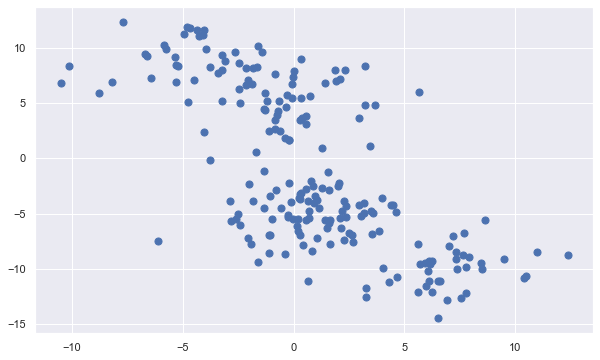

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], s=50)

In [17]:
"""
The following code shows the dasic steps for kneans clustering that are repeated for other models afterwards:

* Importing the model class

* Instantiating a model object 

* Fitting the model object to some data 

* Predicting the outcome given the fitted model for some data
"""

from sklearn.cluster import KMeans # Imports the model class from scikit-learn

model = KMeans(n_clusters = 4, random_state = 0) # Instantiates a model object, given certain parameters; knowledge about the same data is used to inform the instantiation

model.fit(X) # Fits the model object to the raw data
'''
KMeans(algorithm = 'auto', copy_x = T, init='k-means++', max_iter= 300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
      random_state=0, tol=0.0001, verbose=0)

'''

KMeans(n_clusters=4, random_state=0)

In [18]:
y_kmeans = model.predict(X) # Predicts the cluster (number) given the raw data

y_kmeans[:12] # Shows some cluster numbers predicted.

array([3, 3, 0, 2, 2, 1, 3, 3, 1, 2, 0, 2])

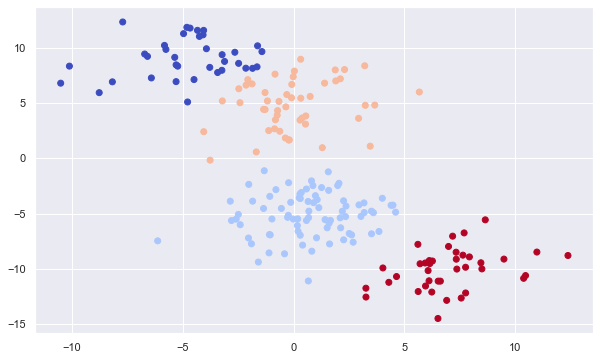

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm')

In [20]:
"""
Gaussina mixture
As an alternative clustering method, consider Gaussian mixture. The application is the same, and with appropriate paremeterization,
the results are also the same:
"""

from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, random_state=14)

In [21]:
model.fit(X)


GaussianMixture(n_components=4, random_state=14)

In [22]:
y_mg = model.predict(X)

In [23]:
y_mg[:12]

array([2, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 3], dtype=int64)

In [24]:
(y_mg == y_kmeans).all()

False

In [45]:
"""
# Classification learning 

Classification problems are characterized by an effort to assign to a certain feature combination a certain class
(integer value) from a relatively small set of classes (integer values)
"""

from sklearn.datasets import make_classification

n_samples = 100

X, y = make_classification(n_samples=n_samples, n_features=8,
                          n_informative=2, n_redundant=0,
                          n_repeated=0, random_state=250)

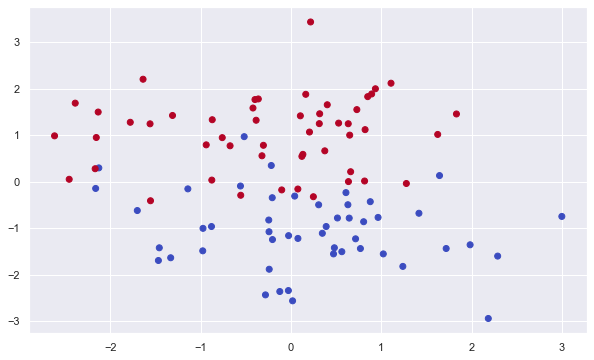

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm')

(array([[ 0.,  8.,  9., 12., 28., 30.,  8.,  4.,  1.,  0.],
        [ 1.,  4., 17., 16., 19., 15., 19.,  8.,  0.,  1.],
        [ 0.,  3.,  6., 24., 35., 15., 12.,  3.,  2.,  0.],
        [ 0.,  1., 10., 31., 24., 22., 10.,  2.,  0.,  0.],
        [ 0.,  2.,  8., 16., 39., 21.,  7.,  6.,  1.,  0.],
        [ 0.,  2.,  7., 23., 27., 22., 15.,  3.,  1.,  0.],
        [ 2.,  6., 11., 24., 14., 22., 16.,  2.,  2.,  1.],
        [ 0.,  4., 10., 13., 32., 29., 10.,  2.,  0.,  0.]]),
 array([-3.44541733, -2.70224998, -1.95908263, -1.21591528, -0.47274793,
         0.27041941,  1.01358676,  1.75675411,  2.49992146,  3.24308881,
         3.98625616]),
 <a list of 8 BarContainer objects>)

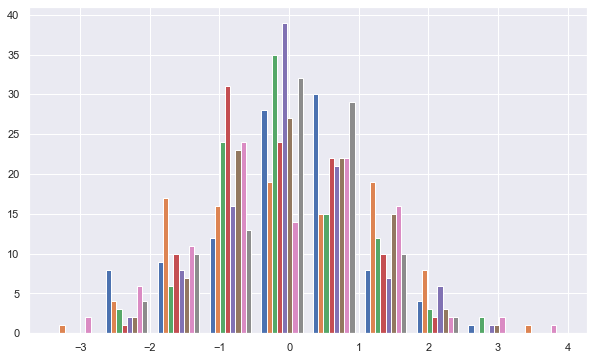

In [48]:
plt.figure(figsize=(10, 6))

plt.hist(X)

In [49]:
"""
# Gaussian Naive Bayes 
GNB is generally considered to be a good baseline algo for a multitude of diffrent classification problems.
The application in inline with 'k-means clusatering'
"""
from sklearn.naive_bayes import GaussianNB